In [1]:
# Import Your Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1

### Your Histogram Equalization Function

In [2]:
import keyword


def hist_equ(image):
    '''
    input:
    image (ndarray): input image
    output:
    output_image (ndarray): enhanced image
    '''
    
    ############
    # Your code
    # Start
    size = image.shape[0:2]
    image_size = size[0]*size[1]
    L = 256

    unique, counts = np.unique(image, return_counts=True)
    pxl_count = dict(zip(unique, counts))

    key = [*pxl_count]
    key.sort() # we can remove this line
    list_sum = [] # sigma (𝑛𝑗 / 𝑛)
    counter = 0

    new_pxl = {}
    
    for item in key:
        counter += pxl_count[item]
        new_pxl.update({item:int((counter/image_size) * (L-1))})


    # print(len(image[0]))
    for row in range(size[0]):
        for col in range(size[1]):
            image[row][col] = new_pxl[image[row][col]]

    return image

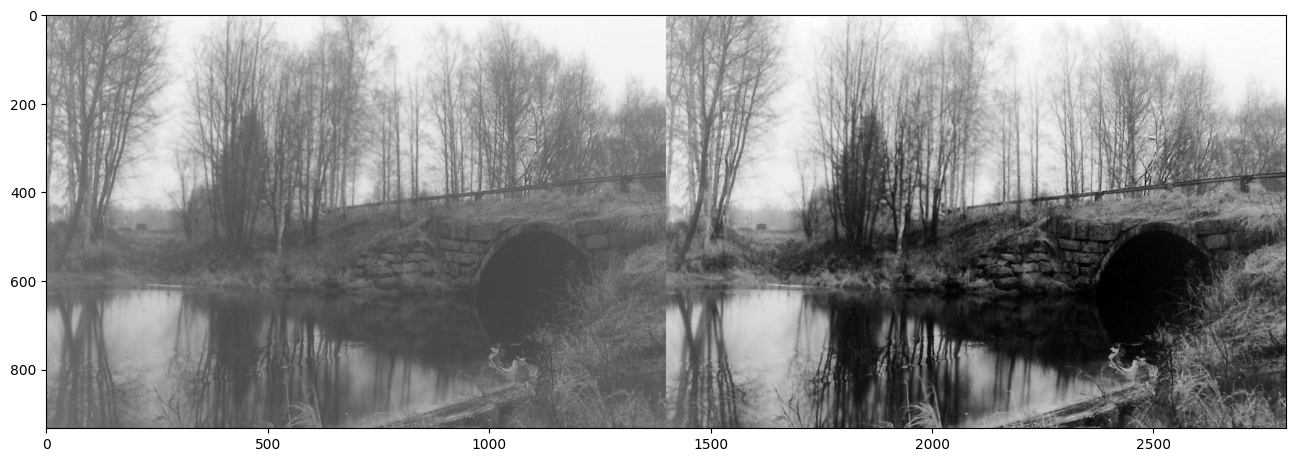

In [3]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ_myself = hist_equ(img)
# END

res = np.hstack((cv2.imread('River.jpg', 0), equ_myself)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### Histogram Equalization OpenCV Library

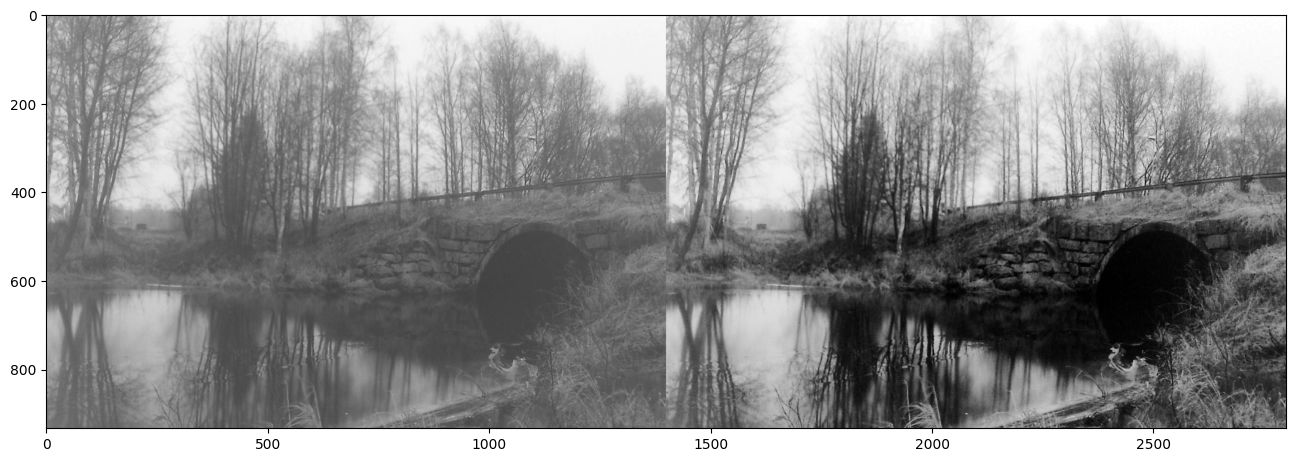

In [4]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ_cv = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ_cv)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### comparing result 

## Part 2

### CLAHE OpenCV Library

In [23]:
def CLAHE(image, gridSize, clip_limit):
    '''
    inputs:
    image (ndarray): input image
    gridSize (tuple): window size
    clip_limit (int): threshold for contrast limiting
    output:
    output_image (ndarray): improved image
    '''

    ############
    # Your code
    # Start
    clahe = cv2.createCLAHE(clipLimit=gridSize, tileGridSize=clip_limit)
    output_image = clahe.apply(image)
    # End

    return output_image

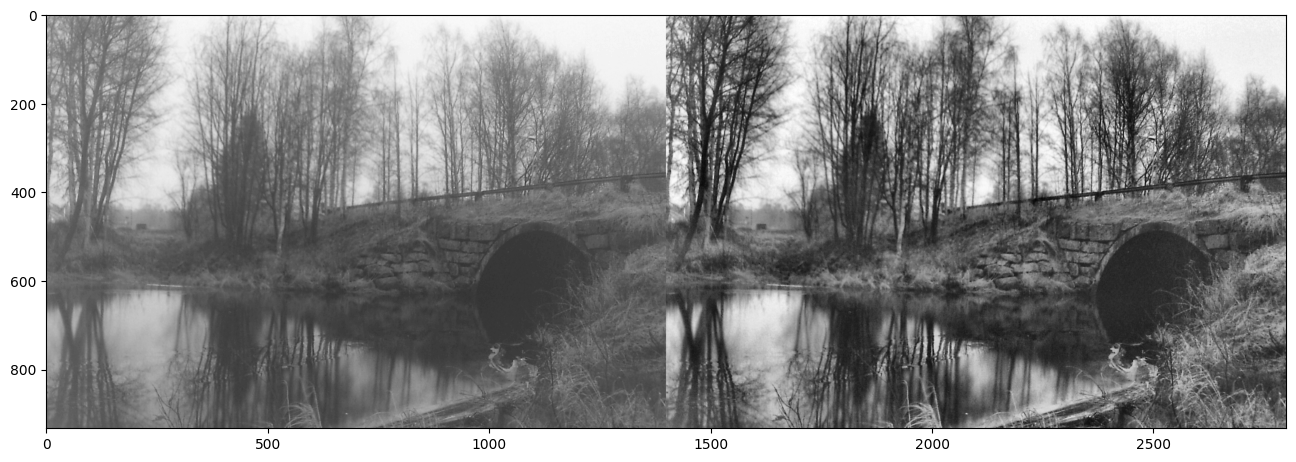

In [21]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
clh = CLAHE(img,2,(8,8))
# END

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 3
Repeat for City image

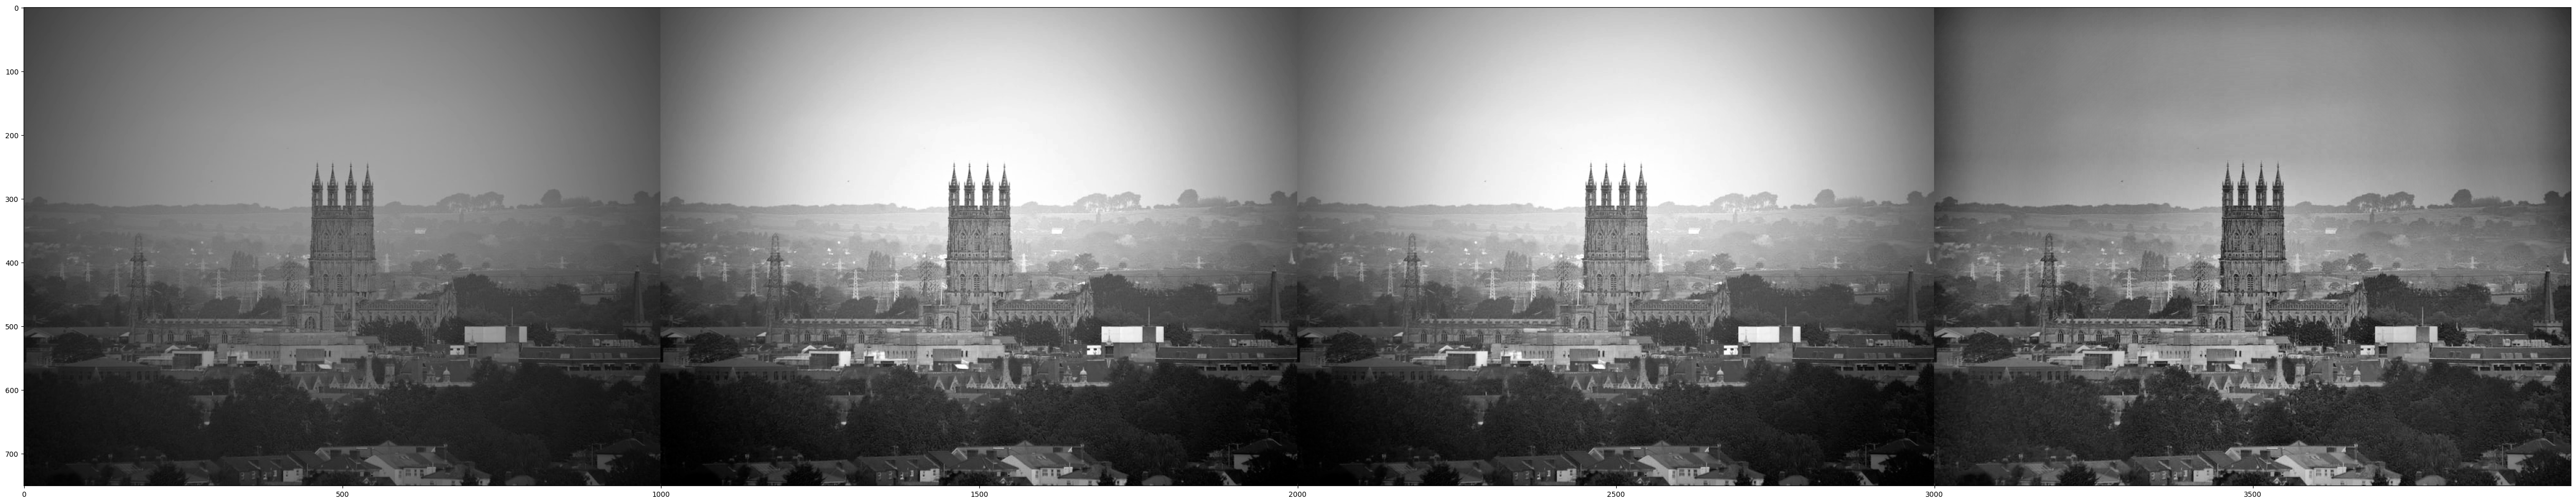

In [25]:
equ_cv = cv2.equalizeHist(cv2.imread('City.jpg', 0))
equ_myself = hist_equ(cv2.imread('City.jpg', 0))
clh = CLAHE(cv2.imread('City.jpg', 0),2,(8,8))

res = np.hstack((cv2.imread('City.jpg', 0),equ_myself,equ_cv,clh)) #stacking images side-by-side

plt.figure(figsize=(64, 16))
plt.imshow(res, cmap='gray')